In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from datetime import datetime, date
from darts import TimeSeries
from darts.models import *
from darts.metrics import *
import logging

logging.disable(logging.CRITICAL)

In [42]:
data = pd.read_csv(r"../datasets/co2_trends_daily/co2_trend_gl.csv",sep=',',skiprows=41)
datos = pd.DataFrame(data)
df = datos.copy()
df['date'] = pd.to_datetime(datos[['day','month','year']])
df = df.drop(columns=['year','day','month'])

In [43]:
series = TimeSeries.from_dataframe(df,time_col='date',value_cols='smoothed')
df = df.set_index('date').sort_index()

In [44]:
def getForecast():
    """Devuelve un dataframe generado a partir de un TimeSeries objects de Darts, predicho usando el modelo LinearRegressionModel, usando datos de los ultimos 10 años de datos disponibles para predecir los proximos N días, donde N = (2030-01-01 - hoy())
    """
    hoy = date.today()
    delta = (date(2030,1,31) - hoy).days
    model_name = 'Linear Regression'
    model = LinearRegressionModel(lags = 3650)
    model.fit(series)
    forecast = model.predict(delta)
    prediction_dataframe = forecast.pd_dataframe()
    return prediction_dataframe

In [45]:
def getKPI_prediction(prediction_dataframe):
    """Devuelve el nivel de emisiones en 2030 (predicho en base a ultimos diez años) con respecto a 2010, en porcentaje
    Ejemplo: 
    243.5 >---->----> El valor predicho para 2030 está un 243.5% del valor objetivo para dicho año"""
    prediction_dataframe.smoothed = prediction_dataframe['smoothed'].astype('float')
    prediccion_2030 = round(prediction_dataframe.loc[prediction_dataframe.index=='2030-01-01']['smoothed'].values[0],2)
    ppm_2010 = 388.37  #Hardcodeado por el momento porque el dataset no contiene datos para 2010. [A mejorar]
    obj_2030 = 0.45*ppm_2010
    KPI = round(prediccion_2030*100/obj_2030,2)
    return KPI

In [51]:
def plotForecast(prediction_dataframe,dataframe=None):
    """Genera gráfico con datos predichos y opcionalmente, si se pasa el dataset de datos original, los muestra juntos"""
    fig, ax = plt.subplots(figsize=(15,5))
    inicio = prediction_dataframe.index.min().date()
    prediction_dataframe.smoothed = prediction_dataframe['smoothed'].astype('float')
    prediction_dataframe['smoothed'].plot(color="red",ls="--",label='Predicción')
    if dataframe is not None:
        dataframe['smoothed'].plot(color="green",label='Datos')
    ax.axvline(inicio,ls='-.',color="black")
    ax.set_title('Datos y predicción con LinearRegressionModel')
    ax.legend(["Predicción",'Datos'])
    plt.show()

In [47]:
forecast = getForecast()


c:\Users\ferch\AppData\Local\Programs\Python\Python310\lib\site-packages\darts\timeseries.py:4079: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(


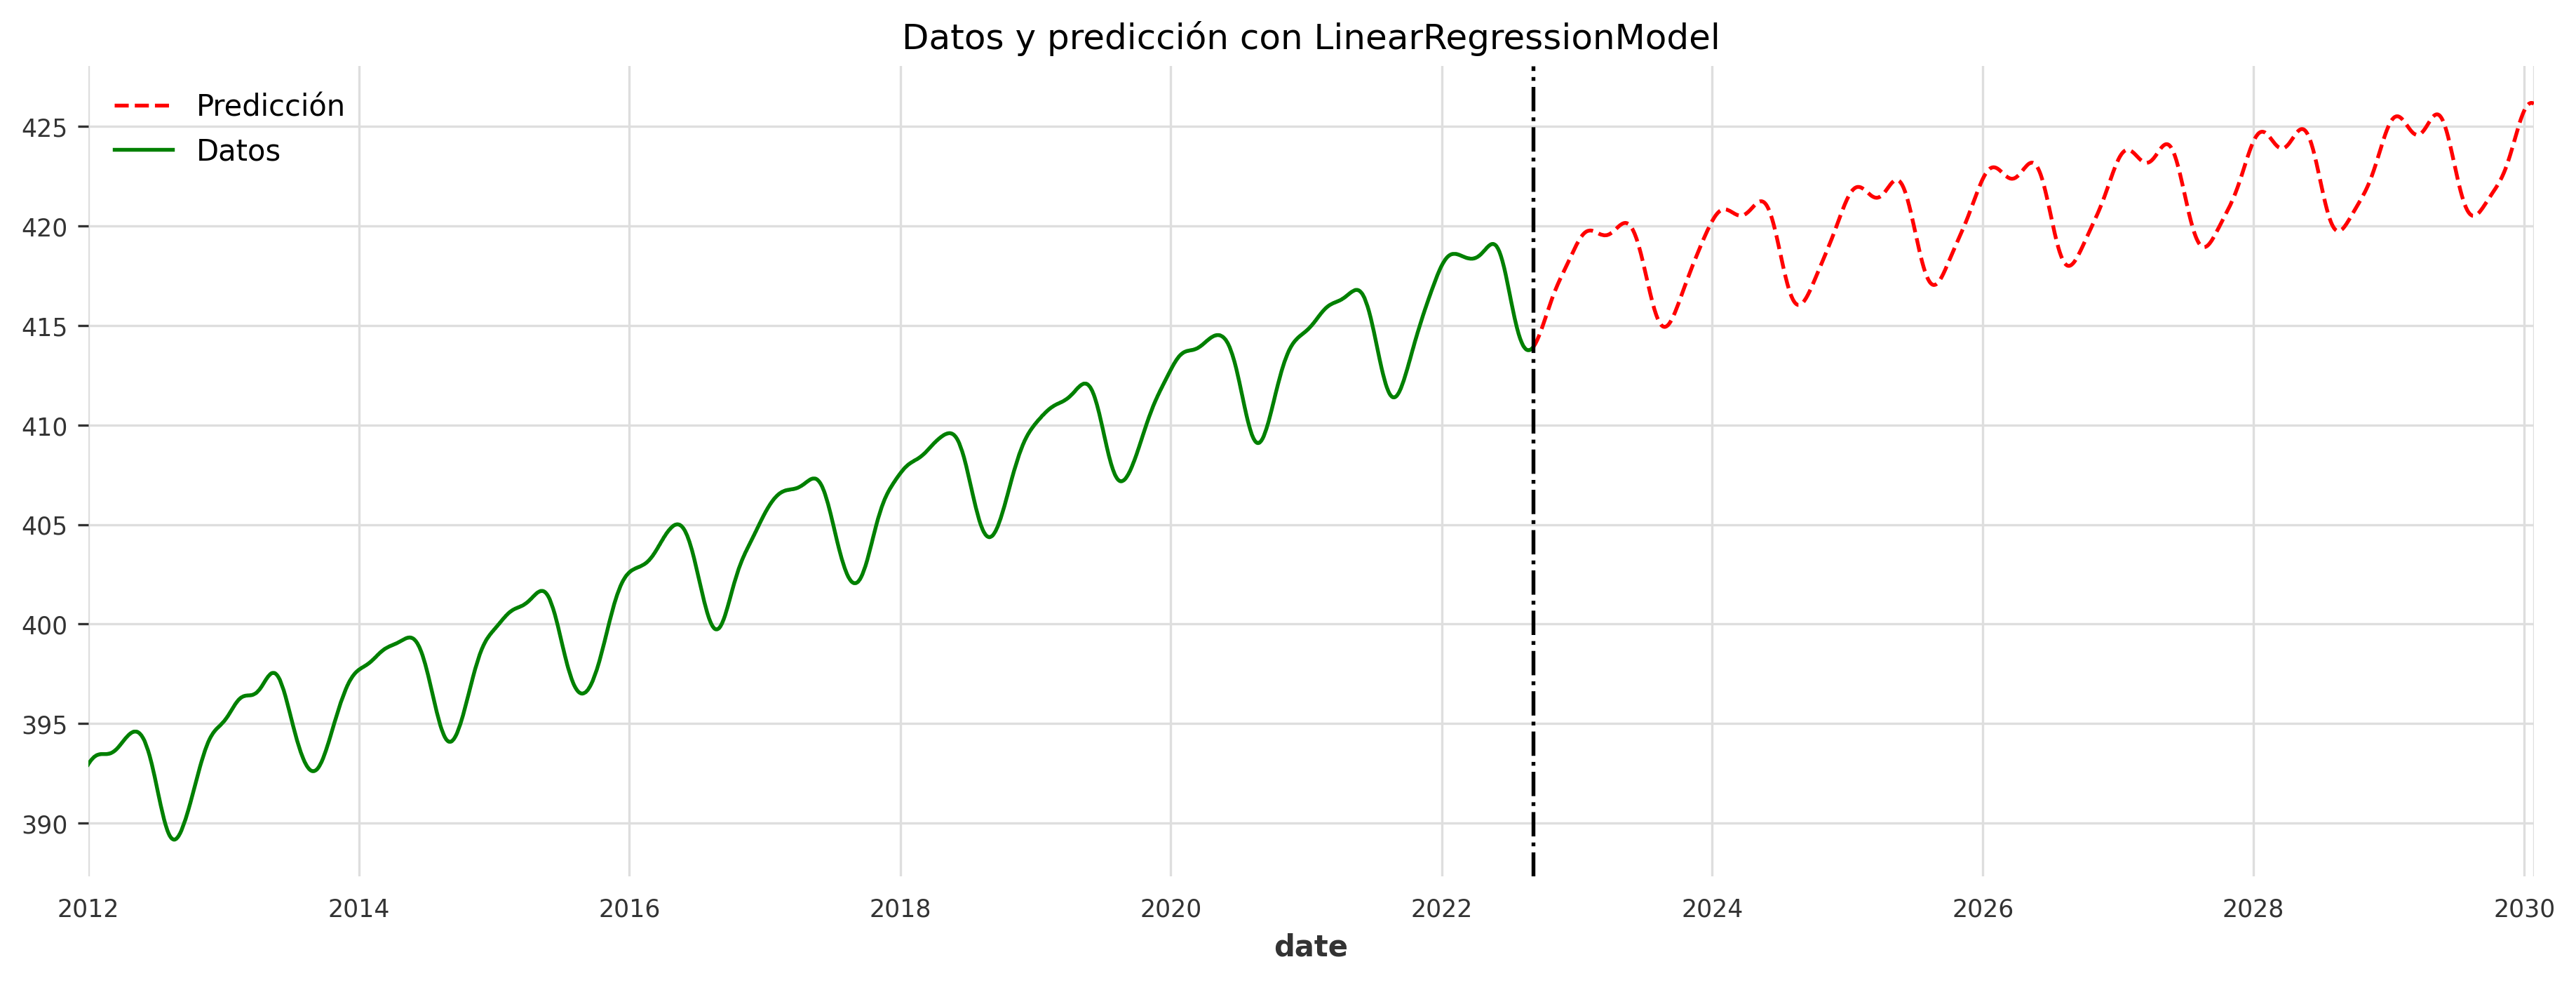

In [54]:
plotForecast(forecast,df)

In [ ]:
getKPI_prediction(forecast)

243.65